## Initiez-vous à la statistique inférentielle
   
Consommation d’essence de cars

Considérons ce second cas, qu’on peut qualifier de continu, par opposition à "discret".
Un constructeur de cars souhaite appréhender la consommation d’essence de son dernier modèle. Pour cela, il lance un 
protocole d’essais sur 128 cars et recueille leur consommation d’essence en litres après avoir parcouru 100 km 
(appelée nombre de litres aux 100) :
{x1,…,x128}={26.23,26.40,26.85,…,35.50,35.50,36.07\.
Pour information, la consommation moyenne observée est égale à 31.45 litres aux 100.
Le constructeur s’adresse à un data analyst pour répondre à plusieurs de ses interrogations :
1- Il aimerait connaître la consommation (théorique) d’essence μ de son modèle de car.
2- De manière plus modeste, il souhaiterait également disposer d’un intervalle autour de cette consommation, il l’aura
en effet évalué sur un nombre limité de véhicules et de trajets.
3- Enfin, il souhaiterait communiquer auprès de ses clients sur un chiffre ambitieux : une consommation égale à μ0=31
litres aux 100.

## Statistique inférentielle

###  stats descs sur Essence

On importe le fichier contenant les consommations d’essence :

In [1]:
import pandas as pd
essence = pd.read_csv("essence.txt")

In [2]:
essence

,conso
0,30.65
1,31.35
2,33.03
3,31.94
4,32.05
...,...
123,30.05
124,26.85
125,33.28
126,32.10


On calcule la moyenne, la variance et l’écart-type de l’échantillon :

In [3]:
import numpy as np, math
xbar=np.mean(essence['conso'])
round(xbar,2)

31.45

In [4]:
sprime = np.std(essence['conso'], ddof=1)
round(sprime,2)

2.16

In [5]:
n_essence = len(essence)
sprime2 = np.var(essence['conso'], ddof=1)
round(sprime2,2)

4.66

Si on souhaite obtenir la variance “biaisée”, on peut l’obtenir ainsi :

In [6]:
v = np.var(essence['conso'])
round(v,2)

4.63

On peut visualiser l’histogramme :

Text(0.5, 1.0, 'histogramme')

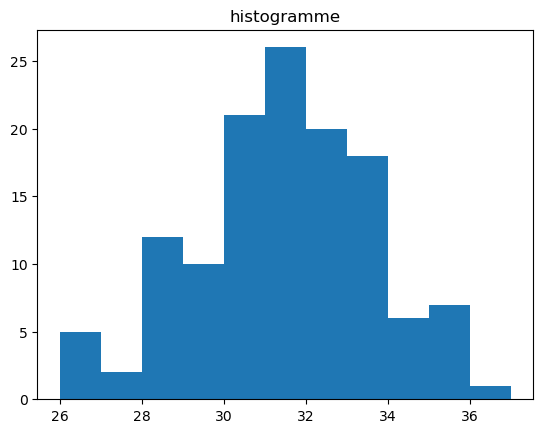

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(essence['conso'],bins=range(26,38))
plt.title("histogramme")

On peut visualiser sur cet histogramme la moyenne empirique :

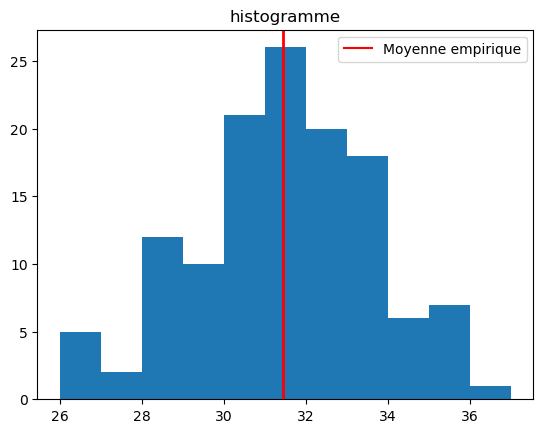

In [8]:
plt.hist(essence['conso'],bins=range(26,38))
plt.title("histogramme")
plt.axvline(xbar, color='r', linewidth=2)
import matplotlib.lines as mlines
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])

On peut visualiser sur cet histogramme la moyenne empirique et le seuil “métier” :

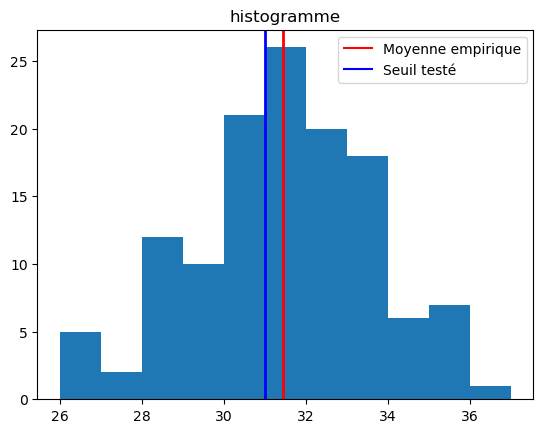

In [9]:
mu0=31  # avec mu0 la moyenne théorique
plt.hist(essence['conso'],bins=range(26,38))
plt.title("histogramme")
plt.axvline(xbar, color='r', linewidth=2)
plt.axvline(mu0, color='b', linewidth=2)
import matplotlib.lines as mlines
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique"),mlines.Line2D([], [], color='blue',markersize=15, label=u"Seuil testé")])

On peut enfin superposer sur cet histogramme la densité gaussienne :

In [10]:
'''
import matplotlib.mlab as mlab
fig, ax = plt.subplots()
n, bins, patches = ax.hist(essence['conso'],normed=True,bins=range(26,38))
bins=np.arange(26,37,0.1)
y = mlab.normpdf(bins, xbar,sprime)*100
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_title(u"Histogramme et densité normale")
'''

# On constate que l’écart entre l’histogrammme, primo-estimation de la densité de probabilité, et la densité gaussienne
# sont plutôt proches.

'\nimport matplotlib.mlab as mlab\nfig, ax = plt.subplots()\nn, bins, patches = ax.hist(essence[\'conso\'],normed=True,bins=range(26,38))\nbins=np.arange(26,37,0.1)\ny = mlab.normpdf(bins, xbar,sprime)*100\nax.plot(bins, y, \'--\')\nax.set_xlabel(\'Smarts\')\nax.set_title(u"Histogramme et densité normale")\n'

### IC sur moyenne Essence

Si on souhaite encadrer la consommation d’essence moyenne (théorique)  μ avec une probabilité de 95%, on obtient alors comme intervalle de confiance
Remarquons ici que l’hypothèse gaussienne n’était pas obligatoire ici, en effet l’échantillon est de taille suffisamment importante (supérieure à 30).

Si on lance “manuellement” les calculs au niveau de test 5% :

In [11]:
alpha = 0.05
import scipy
icinf=xbar-scipy.stats.t.ppf(1-alpha/2,n_essence-1)*sprime/math.sqrt(n_essence)
round(icinf,2)

31.07

In [12]:
icsup=xbar+scipy.stats.t.ppf(1-alpha/2,n_essence-1)*sprime/math.sqrt(n_essence)
round(icsup,2)

31.83

On obtient alors : [31.07 ; 31.83] .

### IC sur variance Essence

Si on souhaite encadrer la variance (théorique) de la consommation d’essence σ2 avec une probabilité de 95%, on obtient alors comme intervalle de confiance
Si on lance “manuellement” les calculs au niveau de test 5% :

In [13]:
icinf = (n_essence-1)*sprime2/scipy.stats.chi2.ppf(1-alpha/2,n_essence-1)
round(icinf,2)

3.7

In [14]:
icsup = (n_essence-1)*sprime2/scipy.stats.chi2.ppf(alpha/2,n_essence-1)
round(icsup,2)

6.06

On obtient alors : [3.70 ; 6.06] .

Remarquons encore ici que l’hypothèse gaussienne n’était pas obligatoire ici, en effet l’échantillon est de taille suffisamment importante (supérieure à 30).

### test sur moyenne Essence

On constate qu’on rejette bien l’hypothèse nulle au niveau de test 5% (0.02<0.05) mais pas au niveau de test 1% (0.02≥1%).

En pratique, le data analyst peut utiliser la commande ttest_1samp pour résoudre ce test :

In [15]:
scipy.stats.ttest_1samp(essence["conso"],31)

Ttest_1sampResult(statistic=2.354357516761916, pvalue=0.020088330843337596)

### test sur variance Essence

Considérons par exemple le test suivant :  {H0:σ2 = σ20 et H1:σ2 ≥ σ20 .
avec  σ20=4.5.

### test comparaison sur Iris

Considérons dans le (fameux) jeu de données historique des iris de Fisher la longueur des pétales d’iris des variétés et , sachant que nous disposons d’échantillons de 50 individus de chaque variété.

In [16]:
from sklearn import datasets
Iris = datasets.load_iris()

In [17]:
def function(x):
    return Iris['target_names'][x]
iris=pd.DataFrame(Iris["data"])
iris.columns = Iris['feature_names']
iris["Species"]=Iris['target']
iris["Species"]=iris["Species"].apply(function)

In [18]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
versi = iris[iris["Species"]=="versicolor"]["petal length (cm)"]
virgi = iris[iris["Species"]=="virginica"]["petal length (cm)"]

On teste tout d’abord l’égalité des variances à l’aide de la commande :

In [20]:
scipy.stats.bartlett(versi,virgi)

BartlettResult(statistic=1.249026225204677, pvalue=0.2637385445079441)

La p-valeur valant 0.26, on ne rejette donc pas l’égalité des variances au niveau de test 5%.

On teste ensuite l’égalité des moyennes à l’aide de la commande :

In [21]:
scipy.stats.ttest_ind(versi,virgi, equal_var=True)

Ttest_indResult(statistic=-12.603779441384985, pvalue=3.1788195478061495e-22)

On obtient une p-valeur égale à environ 3.2×10−22. On constate donc que l’hypothèse d’égalité des longueurs moyennes de pétales est (très facilement) rejetée à un niveau de test de 5%.

Au-delà de l’aspect gaussien que nous n’avions pas vérifié rigoureusement (on pourrait l’éprouver via des tests d’adéquation à une loi), on rejette que les longueurs des pétales d’iris des variétés et suivent la même distribution, on a en effet rejeté l’hypothèse d’égalité des moyennes.

### test Khi-deux sur Weldon

Weldon a réalisé n=26306 lancers de 12 dés à 6 faces et a obtenu les résultats suivants :

In [22]:
df=pd.DataFrame([[0,1,2,3,4,5,6,7,8,9,10,11,12],[185,1149,3265,5475,6114,5194,3067,1331,403,105,14,4,0]])
df.index=["Nombre de 5 ou 6","Effectif"]
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
Nombre de 5 ou 6,0,1,2,3,4,5,6,7,8,9,10,11,12
Effectif,185,1149,3265,5475,6114,5194,3067,1331,403,105,14,4,0


Soit  Xi la v.a.r. à valeurs dans {0,…,12} désignant le nombre de faces comportant un cinq ou un six lors du i-ème lancer.
Dans le cas où les dés sont équilibrés :  Xi∼B(13) On teste si les dés sont équilibrés :

In [23]:
n =[185,1149,3265,5475,6114,5194,3067,1331,403,105,14,4,0]
p0 = scipy.stats.binom.pmf(range(13), 12, 1/3.0)

In [24]:
from scipy.stats import chi2_contingency
chi2_contingency([p0*float(sum(n))*100,n])

(40.742379820747395,
 5.410516619906697e-05,
 12,
 array([[2.02573723e+04, 1.21582848e+05, 3.34457039e+05, 5.57461402e+05,
         6.27099152e+05, 5.01979123e+05, 2.92857954e+05, 1.25526959e+05,
         3.92143653e+04, 8.72959493e+03, 1.30770657e+03, 1.21582685e+02,
         4.90092871e+00],
        [2.02573723e+02, 1.21582848e+03, 3.34457039e+03, 5.57461402e+03,
         6.27099152e+03, 5.01979123e+03, 2.92857954e+03, 1.25526959e+03,
         3.92143653e+02, 8.72959493e+01, 1.30770657e+01, 1.21582685e+00,
         4.90092871e-02]]))

Le test n’est pas valide car les effectifs ne sont pas suffisants pour les valeurs 10, 11 et 12. On agrège ces modalités et on relance les calculs :

In [25]:
n= [185,1149,3265,5475,6114,5194,3067,1331,403,105,18]
p0 =np.array(list(scipy.stats.binom.pmf(range(10), 12, 1/3.0))+[sum(scipy.stats.binom.pmf(range(10,13), 12, 1/3.0))])

In [26]:
n

[185, 1149, 3265, 5475, 6114, 5194, 3067, 1331, 403, 105, 18]

In [27]:
p0

array([0.00770735, 0.04624408, 0.12717122, 0.21195203, 0.23844604,
       0.19075683, 0.11127482, 0.04768921, 0.01490288, 0.00331175,
       0.0005438 ])

In [28]:
chi2_contingency([p0*float(sum(n))*100,n])

(35.13011859908386,
 0.00011863880683773594,
 10,
 array([[2.02573723e+04, 1.21582848e+05, 3.34457039e+05, 5.57461402e+05,
         6.27099152e+05, 5.01979123e+05, 2.92857954e+05, 1.25526959e+05,
         3.92143653e+04, 8.72959493e+03, 1.43419018e+03],
        [2.02573723e+02, 1.21582848e+03, 3.34457039e+03, 5.57461402e+03,
         6.27099152e+03, 5.01979123e+03, 2.92857954e+03, 1.25526959e+03,
         3.92143653e+02, 8.72959493e+01, 1.43419018e+01]]))

On rejette très largement l’hypothèse de dés équilibrés au niveau de test 5%.

### test Kolmogorov-Smirnov sur Essence

On peut tester l’adéquation de la consommation d’essence à une loi normale à l’aide de Kolmogorov-Smirnov :

In [29]:
from scipy.stats import ks_2samp

In [30]:
ks_2samp(essence["conso"],list(np.random.normal(np.mean(essence["conso"]), np.std(essence["conso"]), 1000)))

KstestResult(statistic=0.0565625, pvalue=0.8386531742368674)

On ne peut donc pas rejetter l’hypothèse de normalité au niveau de test 5%.

On aurait également pu lancer un test de Shapiro-Wilk :

In [31]:
scipy.stats.shapiro(essence["conso"])

ShapiroResult(statistic=0.9871521592140198, pvalue=0.2743206322193146)

La conclusion est identique au niveau de test 5%.

Notons que le test de Shapiro-Wilk est recommandé pour tester la normalité dans le cas de petits échantillons.